In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import numpy as np

data_path = "G:\ABCD\script/trail/trail_tsne_RF"
# load data and drop the first column and the subject id
data = pd.read_csv(data_path + "/merged.csv").drop(columns=["Unnamed: 0", "src_subject_id"])
label_columns = data.columns[data.columns.str.startswith("cbcl")].tolist()

data = data[label_columns]


# EFA from previous research

In [102]:
# 找到并移除频率过低的项（超过99.5%的值为0）
low_frequency_columns = data.columns[data.apply(lambda col: (col == 0).mean() > 0.995)]
data_cleaned = data.drop(columns=low_frequency_columns)
print(f"Removed columns with low frequency: {low_frequency_columns.tolist()}")

# 计算相关矩阵
correlation_matrix = data_cleaned.corr(method="pearson")  # 替代使用 Pearson 相关

# 标记相关系数大于 0.x5 的项对
high_corr_pairs = (correlation_matrix.abs() > 0.25).where(lambda x: np.triu(x, 1)).stack().index.tolist()
print(f"Highly correlated pairs (r > 0.75): {high_corr_pairs}")

# 创建新的合成项，不在此处删除列
composite_columns = []
for col1, col2 in high_corr_pairs:
    new_col_name = f"{col1}_{col2}_composite"
    data_cleaned[new_col_name] = data_cleaned[[col1, col2]].mean(axis=1).round().astype(int)  # 四舍五入保留三分类
    composite_columns.append(new_col_name)

# 删除所有参与合成的原始列
cols_to_drop = set([col for pair in high_corr_pairs for col in pair])  # 将所有高相关列放入集合，去重
data_cleaned = data_cleaned.drop(columns=list(cols_to_drop))

print("Aggregated highly correlated items into composites by averaging and rounding to nearest integer.")


Removed columns with low frequency: ['cbcl_q02_p', 'cbcl_q73_p', 'cbcl_q99_p', 'cbcl_q101_p', 'cbcl_q105_p']
Highly correlated pairs (r > 0.75): [('cbcl_q01_p', 'cbcl_q03_p'), ('cbcl_q01_p', 'cbcl_q04_p'), ('cbcl_q01_p', 'cbcl_q08_p'), ('cbcl_q01_p', 'cbcl_q09_p'), ('cbcl_q01_p', 'cbcl_q10_p'), ('cbcl_q01_p', 'cbcl_q11_p'), ('cbcl_q01_p', 'cbcl_q19_p'), ('cbcl_q01_p', 'cbcl_q22_p'), ('cbcl_q01_p', 'cbcl_q25_p'), ('cbcl_q01_p', 'cbcl_q28_p'), ('cbcl_q01_p', 'cbcl_q38_p'), ('cbcl_q01_p', 'cbcl_q41_p'), ('cbcl_q01_p', 'cbcl_q48_p'), ('cbcl_q01_p', 'cbcl_q61_p'), ('cbcl_q01_p', 'cbcl_q62_p'), ('cbcl_q01_p', 'cbcl_q64_p'), ('cbcl_q01_p', 'cbcl_q78_p'), ('cbcl_q01_p', 'cbcl_q109_p'), ('cbcl_q03_p', 'cbcl_q04_p'), ('cbcl_q03_p', 'cbcl_q05_p'), ('cbcl_q03_p', 'cbcl_q07_p'), ('cbcl_q03_p', 'cbcl_q08_p'), ('cbcl_q03_p', 'cbcl_q09_p'), ('cbcl_q03_p', 'cbcl_q10_p'), ('cbcl_q03_p', 'cbcl_q12_p'), ('cbcl_q03_p', 'cbcl_q14_p'), ('cbcl_q03_p', 'cbcl_q16_p'), ('cbcl_q03_p', 'cbcl_q19_p'), ('cbcl_q03_p'

C:\Users\Makka Papa\AppData\Local\Temp\ipykernel_12244\2210968277.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned[new_col_name] = data_cleaned[[col1, col2]].mean(axis=1).round().astype(int)  # 四舍五入保留三分类
C:\Users\Makka Papa\AppData\Local\Temp\ipykernel_12244\2210968277.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned[new_col_name] = data_cleaned[[col1, col2]].mean(axis=1).round().astype(int)  # 四舍五入保留三分类
C:\Users\Makka Papa\AppData\Local\Temp\ipykernel_12244\2210968277.py:17: PerformanceWarning:

Aggregated highly correlated items into composites by averaging and rounding to nearest integer.


C:\Users\Makka Papa\AppData\Local\Temp\ipykernel_12244\2210968277.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned[new_col_name] = data_cleaned[[col1, col2]].mean(axis=1).round().astype(int)  # 四舍五入保留三分类
C:\Users\Makka Papa\AppData\Local\Temp\ipykernel_12244\2210968277.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned[new_col_name] = data_cleaned[[col1, col2]].mean(axis=1).round().astype(int)  # 四舍五入保留三分类
C:\Users\Makka Papa\AppData\Local\Temp\ipykernel_12244\2210968277.py:17: PerformanceWarning:

In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns


# Bartlett 和 KMO 测试
chi_square_value, p_value = calculate_bartlett_sphericity(data_cleaned)
print(f"Bartlett's Test Chi-square: {chi_square_value}, p-value: {p_value}")
kmo_all, kmo_model = calculate_kmo(data_cleaned)
print(f"KMO Test Score: {kmo_model}")

# 因子分析
# fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(data_cleaned)

# 因子载荷
factor_loadings = fa.loadings_
# factor_loadings_df = pd.DataFrame(factor_loadings, columns=["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5", "Factor 6"])
factor_loadings_df = pd.DataFrame(factor_loadings, columns=["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"])
factor_loadings_df.index = data_cleaned.columns
print("Factor Loadings DataFrame:\n", factor_loadings_df)

# 方差解释比例
variance_explained = fa.get_factor_variance()
print("Variance Explained:\n", variance_explained)



c:\Anaconda\envs\PhD\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


Bartlett's Test Chi-square: inf, p-value: 0.0


c:\Anaconda\envs\PhD\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Test Score: 0.995347848186032


In [100]:
# import numpy as np

# # 获取方差解释信息
# variance_explained = fa.get_factor_variance()

# # 每个因子的方差解释量
# variance_ratio = variance_explained[0]

# # 计算累计方差解释比例
# cumulative_variance_ratio = np.cumsum(variance_ratio / np.sum(variance_ratio))

# # 找到解释80%-90%方差时的因子数量
# n_factors_80 = np.argmax(cumulative_variance_ratio >= 0.80) + 1
# n_factors_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# print(f"Number of factors to retain 80% variance: {n_factors_80}")
# print(f"Number of factors to retain 90% variance: {n_factors_90}")
# print("Cumulative variance explained by each factor:", cumulative_variance_ratio)


In [101]:
variance_explained

(array([6.89101179, 6.82560631, 6.06888831, 5.07737585, 3.11058803]),
 array([0.06044747, 0.05987374, 0.05323586, 0.04453838, 0.02728586]),
 array([0.06044747, 0.12032121, 0.17355707, 0.21809546, 0.24538132]))

# PCA

In [85]:
from sklearn.preprocessing import StandardScaler

# 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
import numpy as np

# 计算协方差矩阵
covariance_matrix = np.cov(data_scaled.T)
# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
# 投影到前两个主成分上
data_reduced = np.dot(data_scaled, eigenvectors[:, :6])


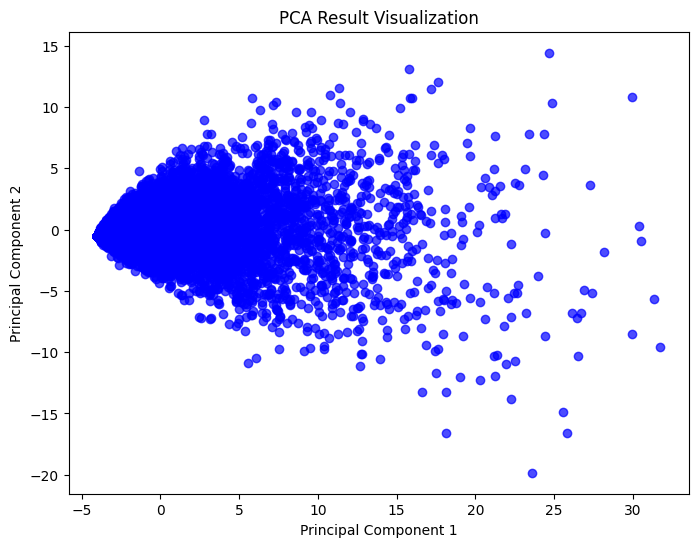

In [86]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 执行 PCA，将数据降维到 2 个主成分
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(data_scaled)

# 可视化 PCA 结果
# plt.figure(figsize=(8, 6))
# plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.7, c='blue')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("PCA Result Visualization")
# plt.show()


In [87]:
# 查看主成分方差解释比例
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.16734445 0.03513401]


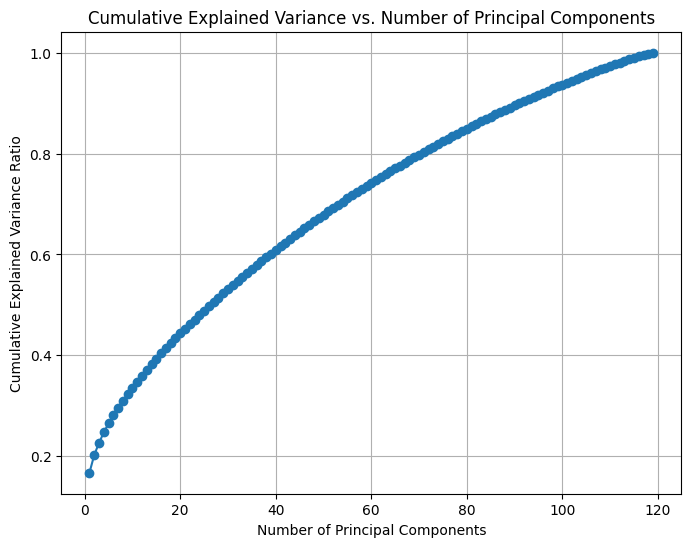

In [88]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 初始化 PCA 对象，不指定主成分数量
pca = PCA()
pca.fit(data_scaled)

# 获取每个主成分的解释方差比
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累计解释方差
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 绘制累计解释方差图
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()


# EFA


In [89]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns


# Bartlett 和 KMO 测试
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's Test Chi-square: {chi_square_value}, p-value: {p_value}")
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test Score: {kmo_model}")

# 因子分析
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(data)

# 因子载荷
factor_loadings = fa.loadings_
factor_loadings_df = pd.DataFrame(factor_loadings, columns=["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5", "Factor 6"])
factor_loadings_df.index = data.columns
print("Factor Loadings DataFrame:\n", factor_loadings_df)

# 方差解释比例
variance_explained = fa.get_factor_variance()
print("Variance Explained:\n", variance_explained)



Bartlett's Test Chi-square: 365587.57120435557, p-value: 0.0
KMO Test Score: 0.9629736080268393


c:\Anaconda\envs\PhD\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Factor Loadings DataFrame:
              Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6
cbcl_q01_p   0.235972  0.388762  0.138310  0.081075  0.170258  0.013847
cbcl_q02_p   0.012487  0.003595  0.003684  0.044103  0.019283 -0.003881
cbcl_q03_p   0.655598  0.161617  0.189031  0.023012  0.085915  0.126884
cbcl_q04_p   0.361832  0.494644  0.115110  0.031739  0.157074  0.114082
cbcl_q05_p   0.213882  0.126987  0.222348  0.116222  0.351820  0.026266
...               ...       ...       ...       ...       ...       ...
cbcl_q108_p  0.078038  0.111699  0.001862  0.083775  0.037260  0.056118
cbcl_q109_p  0.389129  0.155506  0.263768  0.016520  0.105130  0.176279
cbcl_q110_p -0.006291  0.044188  0.048242  0.078826  0.049507  0.024936
cbcl_q111_p  0.067587  0.136297  0.262771  0.139156  0.459052  0.029643
cbcl_q112_p  0.111680  0.138073  0.584246  0.017343  0.057111  0.251664

[119 rows x 6 columns]
Variance Explained:
 (array([8.01721666, 5.62314425, 5.4101311 , 4.29015904, 3.12741

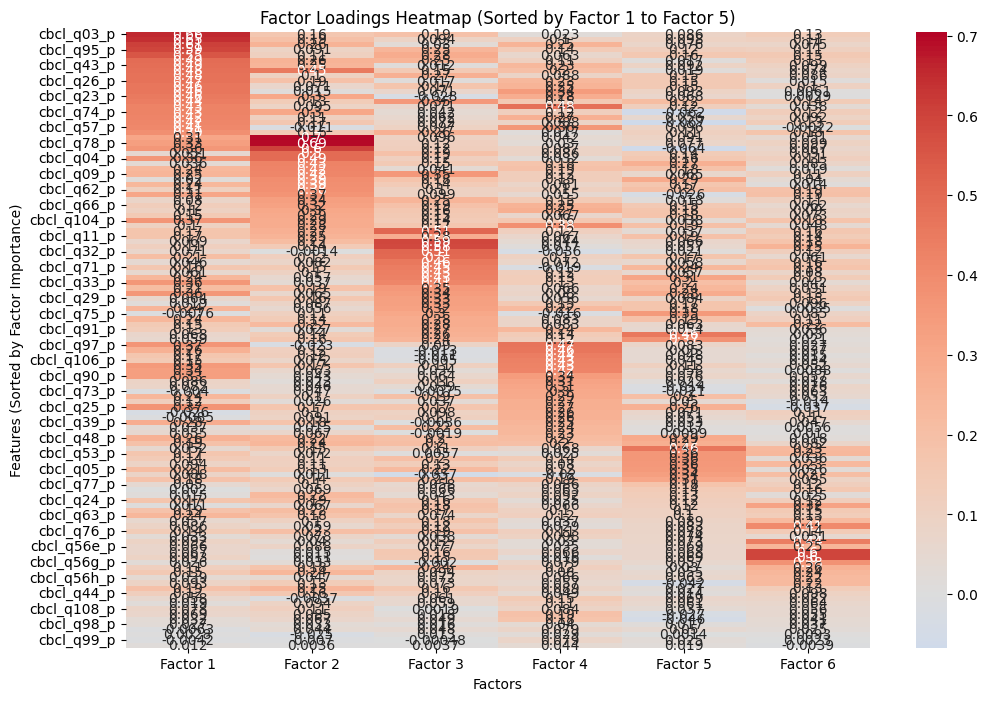

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 对 Factor 1 到 Factor 4 各取前 20 个值，并降序排列
factor1_top20 = factor_loadings_df.sort_values(by="Factor 1", ascending=False).head(20)
remaining_data = factor_loadings_df.drop(factor1_top20.index)

factor2_top20 = remaining_data.sort_values(by="Factor 2", ascending=False).head(20)
remaining_data = remaining_data.drop(factor2_top20.index)

factor3_top20 = remaining_data.sort_values(by="Factor 3", ascending=False).head(20)
remaining_data = remaining_data.drop(factor3_top20.index)

factor4_top20 = remaining_data.sort_values(by="Factor 4", ascending=False).head(20)
remaining_data = remaining_data.drop(factor4_top20.index)

factor5_top20 = remaining_data.sort_values(by="Factor 5", ascending=False).head(20)
remaining_data = remaining_data.drop(factor5_top20.index)

# 剩余数据按 Factor 5 降序排列
factor6_sorted = remaining_data.sort_values(by="Factor 6", ascending=False)

# 将五部分组合成新的 DataFrame
sorted_factors_df = pd.concat([factor1_top20, factor2_top20, factor3_top20, factor4_top20, factor5_top20, factor6_sorted])

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_factors_df, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap (Sorted by Factor 1 to Factor 5)")
plt.xlabel("Factors")
plt.ylabel("Features (Sorted by Factor Importance)")
plt.show()


In [91]:
# 获取方差解释信息
variance_explained = fa.get_factor_variance()

# 每个因子的方差解释比例
variance_ratio = variance_explained[0]
print("Variance explained by each factor:", variance_ratio)

# 累计方差解释比例
cumulative_variance_ratio = variance_explained[1]
print("Cumulative variance explained by factors:", cumulative_variance_ratio)

# 打印最后的累计方差解释比例
total_variance_explained = cumulative_variance_ratio[-1]
print(f"Total variance explained by all factors: {total_variance_explained:.2f}")


Variance explained by each factor: [8.01721666 5.62314425 5.4101311  4.29015904 3.12741773 2.86206372]
Cumulative variance explained by factors: [0.06737157 0.04725331 0.04546329 0.03605176 0.02628082 0.02405096]
Total variance explained by all factors: 0.02


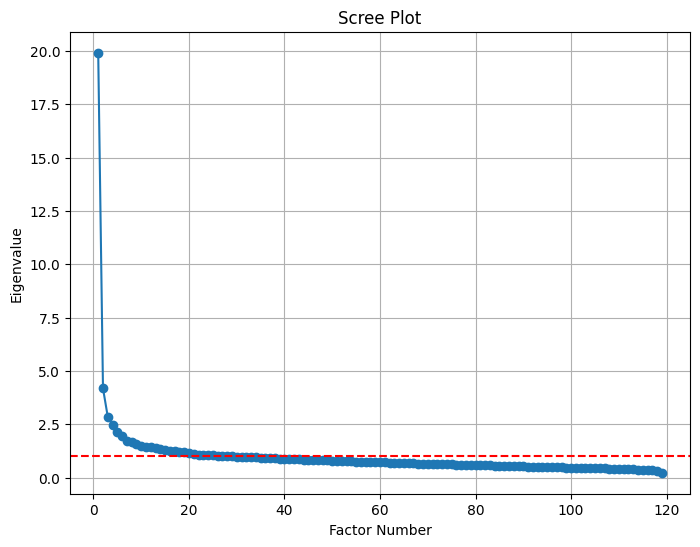

In [92]:
from factor_analyzer import FactorAnalyzer

# 创建因子分析对象，并选择一个较大的因子数量（如 10）
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(data)

# 获取特征值
eigenvalues, _ = fa.get_eigenvalues()

# 绘制碎石图
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.axhline(y=1, color='r', linestyle='--')  # 参考线，Kaiser标准
plt.grid()
plt.show()


In [93]:
# 获取累计方差解释比例
variance_explained = fa.get_factor_variance()
cumulative_variance_ratio = variance_explained[1]

# 找到累计方差解释达到 80%-90% 时的因子数量
n_factors_cumulative = sum(cumulative_variance_ratio < 0.90) + 1
print(f"Number of factors to retain 90% variance: {n_factors_cumulative}")


Number of factors to retain 90% variance: 6
